This model is to predict the future value of Bitcoin to USD price .
I think the based on past data we can predict what will be the future value of Boitcoing to USD price.
The Bitcoin to USD data was downloaded from finance.yahoo.com. The dfata  is a weekly closing price.~

# 1. Loading required modules.

In [1]:
# Module to use python features
import pandas as pd

# Module to plot and data visualization
import matplotlib.pyplot as plt

%matplotlib inline

# Module to plot and data visualization
import numpy as np


# 2. Loading the data and analyzing

In [2]:
trade_df= pd.read_csv("UBS.csv")

In [3]:
trade_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-08-18,17.650000,17.740000,17.639999,17.690001,13.292341,1081200.0
1,2014-08-19,17.709999,17.750000,17.680000,17.709999,13.307367,1121500.0
2,2014-08-20,17.590000,17.690001,17.559999,17.650000,13.262283,1406700.0
3,2014-08-21,17.760000,17.940001,17.750000,17.940001,13.480191,2049200.0
4,2014-08-22,17.740000,17.790001,17.629999,17.680000,13.284825,1769200.0


In [4]:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
Date         1259 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null float64
dtypes: float64(6), object(1)
memory usage: 68.9+ KB


## Since we only want to predict the closing price , removing all other attributes from data model. We only need the date and closing price

In [5]:
trade_df=trade_df.drop(columns=['Open','High','Low','Adj Close','Volume'])

## Renaming the header name as this is weekly data

In [6]:
trade_df.rename(columns={'Date':'Day'}, 
                 inplace=True)

In [7]:
trade_df.dropna()

,Day,Close
0,2014-08-18,17.690001
1,2014-08-19,17.709999
2,2014-08-20,17.650000
3,2014-08-21,17.940001
4,2014-08-22,17.680000
5,2014-08-25,17.850000
6,2014-08-26,17.959999
7,2014-08-27,18.020000
8,2014-08-28,17.930000
9,2014-08-29,17.940001


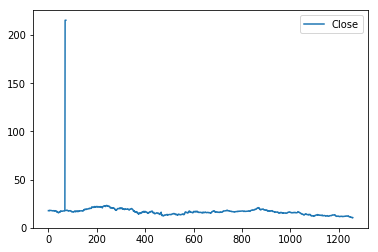

In [8]:
trade_df.plot()

looking at the graph it seems there is some mistake in the data. further analysis found that dec 2014 some value are very high which is not correct. so we drop anything before Jan 2015.

In [9]:
## Converting the Day column into a datetime 

from datetime import datetime
trade_df['Day']=  pd.to_datetime(trade_df['Day']).dt.strftime('%Y-%m-%d')

In [10]:
# trade_df.drop(trade_df['Day'] == '24-11-2014')

mask = ( trade_df['Day']  > '2014-12-31')
trade_df = trade_df.loc[(mask)]

In [11]:
trade_df.set_index('Day', inplace=True  )
#trade_df['Week'] = pd.DatetimeIndex(start ='2014-06-01', end='2019-06-04', freq ='w') 


In [12]:
# Creating a copy data set so that we can retain the original data
trade=trade_df 


In [13]:
trade.tail()

,Close
Day,
2019-08-12,10.64
2019-08-13,10.63
2019-08-14,10.16
2019-08-15,10.16
2019-08-16,10.40


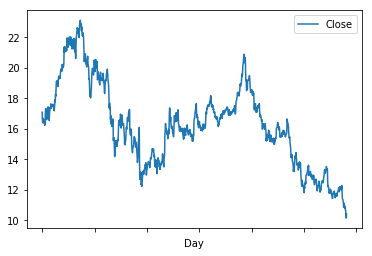

In [14]:
trade.plot()

# decomposing time series data 
1. seasonality
2. peak in some time of year
3. repetative beahiviur
4. residual: nosie
    

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(trade, model='multiplicative', freq=52 )

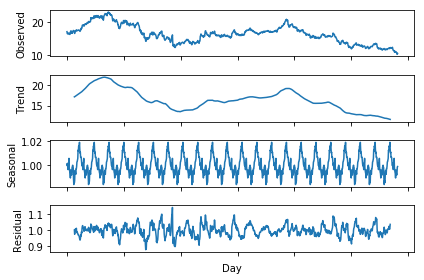

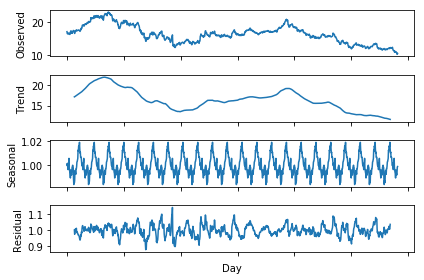

In [16]:
decomposition.plot()

In [17]:
trend= decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

    

In [ ]:
plt.figure(figsize=(10,10))
plt.figure(1)
plt.subplot(411)
plt.plot(trend*seasonal*residual, label='Original')
plt.plot(trend,label='Trend',linestyle='--')
plt.legend(loc='best')


plt.subplot(412)

plt.plot(seasonal,label='seasonal' )
plt.legend(loc='best')

plt.subplot(413)

plt.plot(residual,label='Residuals')
plt.legend(loc='best')




KPSS Test

In [18]:
from statsmodels.tsa.stattools import kpss

In [19]:

ts = trade['Close']

kpss(ts)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(2.1064702184718174,
 0.01,
 23,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

since pvalue .01 is greater then 0.05 we reject our hypothesis that the data is stationary and hence assume it is not stationary.0

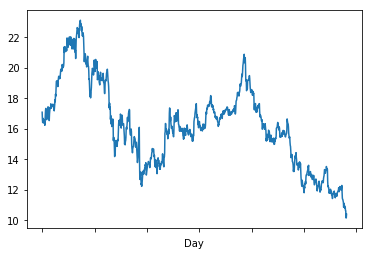

In [20]:
ts.plot()

In [21]:
ts_log = np.log(ts)

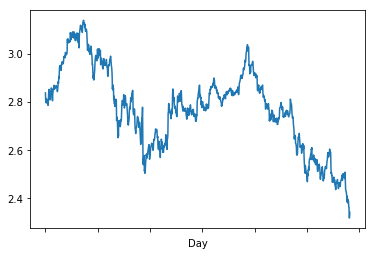

In [22]:
ts_log.plot()

In [23]:
kpss(ts_log.diff().dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.17711442482793172,
 0.1,
 23,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Our p-value is now greater than 0.05, so we can accept the null hypothesis that our data is stationary.

In [24]:
ts=ts_log

# (Partial) Autocorrelation Function

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
plot_acf(trade)
plt.xlim(0,50)

In [ ]:
diff = trade.diff(1).dropna()

In [ ]:
diff.plot()

In [ ]:

decomposition=seasonal_decompose(diff, model='additive', freq=52)



In [ ]:
decomposition.plot()

# d = 1

In [ ]:
plot_acf(diff)
plt.xlim(0,20)

In [ ]:
# for q :  pick a number where in disapper in blue area.. here it is first record.. so will pick the value of 1

# looking for p variable

In [ ]:
plot_pacf(diff, lags=10)

## for p pick a number where it disappear in blue area.. here it is first record.. so will pick the value of 2
# p=2

In [ ]:
# finally  p=2,  d=1, q=1,

# Building SARIMAX model

In [ ]:
# for splitting data we need to split by time rather than randomly picking a data set for test and train~

In [ ]:

train = trade[:-200]
test = trade[-200:]

In [ ]:
train.head()

# 3. Creating the data model and prediction

In [ ]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(train, order=(2,1,1), seasonal_order=(1,0,4,3), enforce_stationarity=False, enforce_invertibility=False)

In [74]:
results = model.fit()

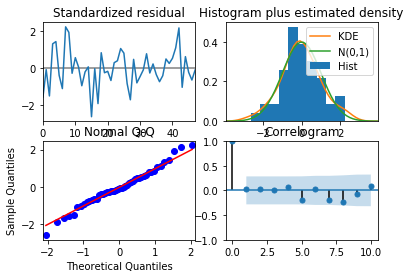

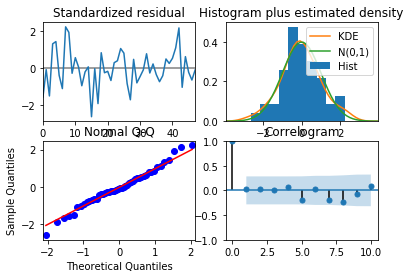

In [75]:
results.plot_diagnostics()

In [76]:
pred = results.predict(start=200,end=250)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [77]:
pred.head()

200    244.293384
201    244.293384
202    244.293384
203    244.293384
204    244.293384
dtype: float64

In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                         Adj Close   No. Observations:                   63
Model:             SARIMAX(2, 1, 1)x(1, 0, 4, 3)   Log Likelihood                -216.765
Date:                           Sun, 28 Jul 2019   AIC                            451.529
Time:                                   00:00:19   BIC                            468.370
Sample:                                        0   HQIC                           457.893
                                            - 63                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5597      0.148      3.791      0.000       0.270       0.849
ar.L2          0.3138      0.125      2.506      0.012       0.068       0.559
ma.L1         -1.0000   1237.522     -0.001      0.999   -2426.499    2424.499
ar.S.L3       -0.6269      0.105     -5.968      0.000      -0.833      -0.421
ma.S.L3        0.6698      0.264      2.537      0.011       0.152       1.187
ma.S.L6       -0.3787      0.280     -1.352      0.176      -0.928       0.170
ma.S.L9       -0.4321      0.278     -1.554      0.120      -0.977       0.113
ma.S.L12      -0.1939      0.212     -0.915      0.360      -0.609       0.221
sigma2       420.3379    5.2e+05      0.001      0.999   -1.02e+06    1.02e+06
===================================================================================
Ljung-Box (Q):                       32.76   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.78   Prob(JB):                         0.94
Heteroskedasticity (H):               0.37   Skew:                             0.02
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.26e+14. Standard errors may be unstable.
"""

In [79]:
# PLottting the predic ted resulted versur actuals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


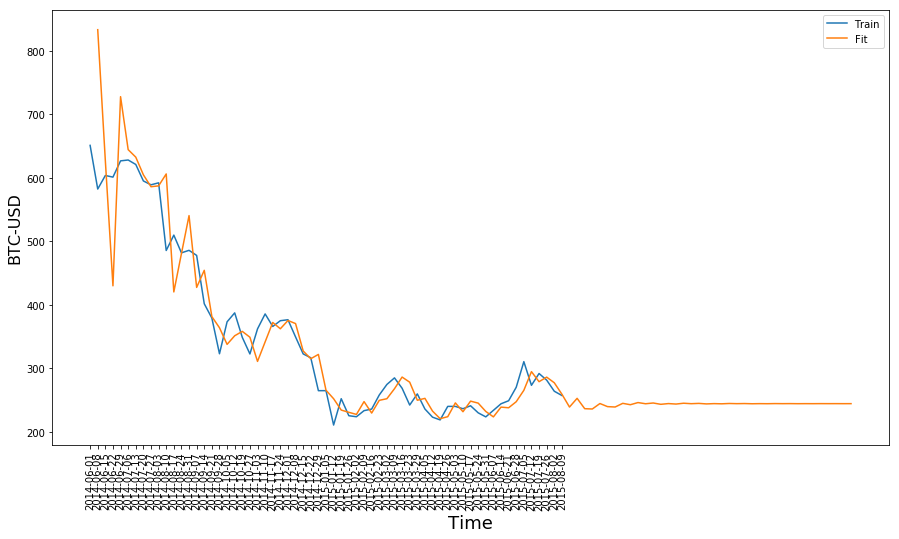

In [48]:
fit= results.predict(start=1,end=100)

plt.figure(figsize=(15,8))
plt.plot(train, label='Train')
plt.plot(fit, label='Fit')
#plt.plot(train, label='Train')
plt.legend(loc='best')
plt.xlabel('Time', fontsize=18)
plt.ylabel('BTC-USD', fontsize=16)
plt.xticks( rotation='vertical') 
plt.show()

In [25]:
# These are the relevant libraries we'll use.
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [26]:
# This method finds the MSE of a single ARIMA model.
def evaluate_arima_model(data, arima_order):
    split=int(len(data) * 0.8) # Needs to be an integer because it is later used as an index.
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [27]:
# This method evaluates ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [28]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [29]:
import warnings
warnings.filterwarnings("ignore")
evaluate_models(ts , p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.075
ARIMA(0, 0, 1) MSE=0.021
ARIMA(0, 1, 0) MSE=0.000
ARIMA(0, 1, 1) MSE=0.000
ARIMA(0, 1, 2) MSE=0.000
ARIMA(0, 2, 0) MSE=0.000
ARIMA(0, 2, 1) MSE=0.000
ARIMA(0, 2, 2) MSE=0.000
ARIMA(1, 0, 0) MSE=0.000
ARIMA(1, 0, 1) MSE=0.000
ARIMA(1, 0, 2) MSE=0.000
ARIMA(1, 1, 0) MSE=0.000
ARIMA(1, 1, 1) MSE=0.000
ARIMA(1, 2, 0) MSE=0.000
ARIMA(2, 0, 0) MSE=0.000
ARIMA(2, 0, 1) MSE=0.000
ARIMA(2, 0, 2) MSE=0.000
ARIMA(2, 1, 0) MSE=0.000
ARIMA(2, 2, 0) MSE=0.000
Best ARIMA(0, 1, 2) MSE=0.000


In [53]:
p=0
d=0
q=1
model = ARIMA(ts, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(1)

In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1164
Model:                     ARMA(0, 1)   Log Likelihood                1149.052
Method:                       css-mle   S.D. of innovations              0.090
Date:                Sun, 18 Aug 2019   AIC                          -2292.105
Time:                        08:49:38   BIC                          -2276.926
Sample:                             0   HQIC                         -2286.379
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.7754      0.005    540.853      0.000       2.765       2.785
ma.L1.Close     0.9443      0.008    124.435      0.000       0.929       0.959
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0589           +0.0000j            1.0589            0.5000
-----------------------------------------------------------------------------
"""

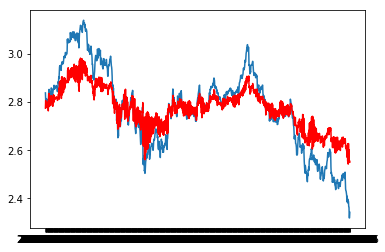

In [56]:
plt.plot(ts)
plt.plot(model_fit.predict(), color = 'red')

In [55]:
model_fit.predict()

Day
2015-01-02    2.775405
2015-01-05    2.806898
2015-01-06    2.777071
2015-01-07    2.790961
2015-01-08    2.794391
2015-01-09    2.790332
2015-01-12    2.788555
2015-01-13    2.781920
2015-01-14    2.799081
2015-01-15    2.778137
2015-01-16    2.799713
2015-01-20    2.763768
2015-01-21    2.814779
2015-01-22    2.780902
2015-01-23    2.836382
2015-01-26    2.790751
2015-01-27    2.828203
2015-01-28    2.788743
2015-01-29    2.794612
2015-01-30    2.803105
2015-02-02    2.785766
2015-02-03    2.813117
2015-02-04    2.804058
2015-02-05    2.826640
2015-02-06    2.805521
2015-02-09    2.821587
2015-02-10    2.804914
2015-02-11    2.798117
2015-02-12    2.782611
2015-02-13    2.821892
                ...   
2019-07-08    2.653327
2019-07-09    2.613205
2019-07-10    2.644756
2019-07-11    2.626024
2019-07-12    2.654649
2019-07-15    2.632265
2019-07-16    2.647979
2019-07-17    2.630026
2019-07-18    2.641505
2019-07-19    2.637697
2019-07-22    2.628754
2019-07-23    2.648181
2019-07